In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime

In [3]:
do_data = pd.read_csv('DO data.csv')

In [4]:
do_data['dt'] = do_data['year'].astype(str) + '-' + do_data['month'].astype(str) + '-' + \
                do_data['day'].astype(str) + ' ' + do_data['time']

do_data['date'] = pd.to_datetime(do_data['dt'], errors = 'coerce')

do_data = do_data.drop(['dt'], axis = 1)

do_data = do_data.set_index(do_data['date'])

In [5]:
def month_n2s(n):
    if n == 10:
        return 'Oct, 29.9 (2004) / 30.7 (2005)'
    elif n == 11:
        return 'Nov, 26.3 (2004) / 27.8 (2005)'
    elif n == 12:
        return 'Dec, 21.8 (2004) / 23 (2005)'
    elif n == 1:
        return 'Jan, 19.5 (2005) / 20 (2006)'
    elif n == 2:
        return 'Feb, 20.7 (2005), / 22.7 (2006)'
    elif n == 3:
        return 'March, 23.8 (2005)'
    elif n == 4:
        return 'April, 28 (2005)'
    elif n == 5:
        return 'May, 31.6 (2005)'
    elif n == 6:
        return 'June, 33.4 (2005)'
    elif n == 7:
        return 'July, 35.3 (2005)'
    elif n == 8:
        return 'August, 35.7 (2005)'
    else:
        return 'Sep, 33.4 (2005)'

In [6]:
def day_n2s(n):
    if n == 0:
        return 'Mon'
    elif n == 1:
        return 'Tue'
    elif n == 2:
        return 'Wed'
    elif n == 3:
        return 'Thu'
    elif n == 4:
        return 'Fri'
    elif n == 5:
        return 'Sat'
    else:
        return 'Sun'

In [7]:
time_midnight = datetime.time(0)
time_2am = datetime.time(2)
time_4am = datetime.time(4)
time_6am = datetime.time(6)
time_8am = datetime.time(8)
time_10am = datetime.time(10)
time_noon = datetime.time(12)
time_2pm = datetime.time(14)
time_4pm = datetime.time(16)
time_6pm = datetime.time(18)
time_8pm = datetime.time(20)
time_10pm = datetime.time(22)
time_1159pm = datetime.time(23, 59, 59)

In [8]:
def time2bin(d):
    if time_midnight <= d < time_2am:
        return 'midnight_2AM'
    elif time_2am <= d < time_4am:
        return '2AM_4AM'
    elif time_4am <= d < time_6am:
        return '4AM_6AM'
    elif time_6am <= d < time_8am:
        return '6AM_8AM'
    elif time_8am <= d < time_10am:
        return '8AM_10AM'
    elif time_10am <= d < time_noon:
        return '10AM_noon'
    elif time_noon <= d < time_2pm:
        return 'noon_2PM'
    elif time_2pm <= d < time_4pm:
        return '2PM_4PM'
    elif time_4pm <= d < time_6pm:
        return '4PM_6PM'
    elif time_6pm <= d < time_8pm:
        return '6PM_8PM'
    elif time_8pm <= d < time_10pm:
        return '8PM_10PM'
    elif time_10pm <= d <= time_1159pm:
        return '10PM_midnight'

In [9]:
do_months = do_data.month.map(lambda n : month_n2s(n))

do_data_dayn = do_data.date.map(lambda x : x.weekday())

do_data_days = do_data_dayn.map(lambda x : day_n2s(x))

do_data_timebins = do_data.date.map(lambda t : time2bin(t.time()))

In [10]:
do_data['month_str'] = do_months

do_data['dayofweek_int'] = do_data_dayn

do_data['dayofweek_str'] = do_data_days

do_data['timebins'] = do_data_timebins

In [11]:
do_data.head()

,time,day,month,year,lane 1,lane 2,lane 3,lane 4,lane 5,date,month_str,dayofweek_int,dayofweek_str,timebins
date,,,,,,,,,,,,,,
2004-10-01 00:00:00,12:00:00 AM,1,10,2004,1.72000,1.77,1.83000,2.13000,1.96,2004-10-01 00:00:00,"Oct, 29.9 (2004) / 30.7 (2005)",4,Fri,midnight_2AM
2004-10-01 01:29:28,01:29:28 AM,1,10,2004,1.67000,1.61,2.04999,1.95000,1.80,2004-10-01 01:29:28,"Oct, 29.9 (2004) / 30.7 (2005)",4,Fri,midnight_2AM
2004-10-01 02:58:56,02:58:56 AM,1,10,2004,2.08000,1.79,1.54000,1.79000,2.08,2004-10-01 02:58:56,"Oct, 29.9 (2004) / 30.7 (2005)",4,Fri,2AM_4AM
2004-10-01 04:28:24,04:28:24 AM,1,10,2004,1.66000,1.32,2.21000,2.02999,1.64,2004-10-01 04:28:24,"Oct, 29.9 (2004) / 30.7 (2005)",4,Fri,4AM_6AM
2004-10-01 05:57:52,05:57:52 AM,1,10,2004,2.05999,1.63,1.35000,1.61999,1.91,2004-10-01 05:57:52,"Oct, 29.9 (2004) / 30.7 (2005)",4,Fri,4AM_6AM


In [12]:
do_data_month_medians = do_data.groupby('month').median()

In [13]:
do_data_month_medians.head(12)

,day,year,lane 1,lane 2,lane 3,lane 4,lane 5,dayofweek_int
month,,,,,,,,
1,16.0,2005.5,2.79499,1.86000,2.410,1.640,1.04000,3.0
2,14.0,2005.5,2.10000,1.90000,1.860,1.095,1.80000,3.0
3,16.0,2005.0,1.95000,1.97000,2.140,0.500,2.12000,3.0
4,15.0,2005.0,9.99999,1.40000,2.970,0.640,6.55999,3.0
5,15.0,2005.0,0.06000,1.89000,1.610,1.560,1.68000,3.0
6,15.0,2005.0,0.24000,2.24000,0.880,0.000,1.12000,3.0
7,16.0,2005.0,2.55999,3.27999,1.260,0.000,0.13000,3.0
8,16.0,2005.0,2.51999,1.76000,0.860,0.000,1.61999,3.0
9,15.0,2005.0,3.31999,1.69000,1.270,0.140,0.03000,3.0


Text(0.5, 60.0, 'Airline')

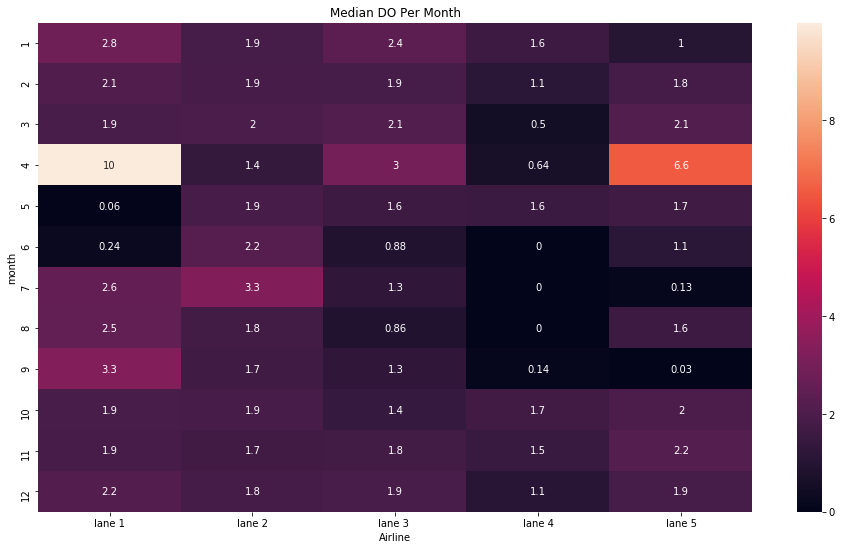

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(16,9))

# Add title
plt.title("Median DO Per Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=do_data_month_medians[['lane 1', 'lane 2', 'lane 3 ', 'lane 4', 'lane 5']], annot=True)

# Add label for horizontal axis
plt.xlabel("Airline")

In [15]:
do_data_month_medians.head()

,day,year,lane 1,lane 2,lane 3,lane 4,lane 5,dayofweek_int
month,,,,,,,,
1,16.0,2005.5,2.79499,1.86,2.41,1.640,1.04000,3.0
2,14.0,2005.5,2.10000,1.90,1.86,1.095,1.80000,3.0
3,16.0,2005.0,1.95000,1.97,2.14,0.500,2.12000,3.0
4,15.0,2005.0,9.99999,1.40,2.97,0.640,6.55999,3.0
5,15.0,2005.0,0.06000,1.89,1.61,1.560,1.68000,3.0


In [16]:
do_months = do_data_month_medians.index.map(lambda n : month_n2s(n))

In [17]:
do_data_month_medians['month_str'] = do_months

In [18]:
do_data_month_medians.to_csv('do_data__month_med.csv')

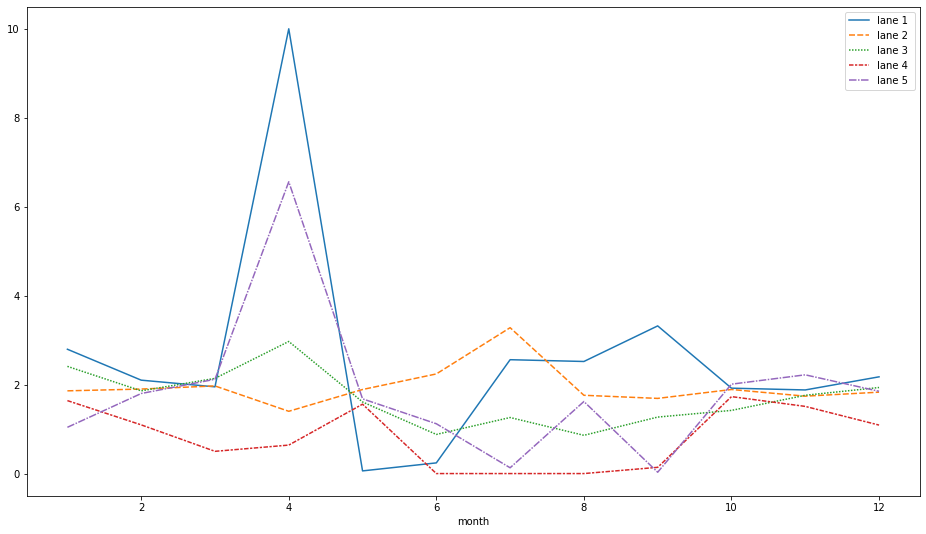

In [20]:
plt.figure(figsize = (16, 9))

sns.lineplot(data = do_data_month_medians[['lane 1', 'lane 2', 'lane 3 ', 'lane 4', 'lane 5']])